In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dados = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt',
                    header = None,
                    names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])

dados.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
dados.shape

(1372, 5)

In [3]:
dados.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [15]:
dados.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [20]:
dados.max() - dados.min()

variance    13.8669
skewness    26.7247
curtosis    23.2135
entropy     10.9977
class        1.0000
dtype: float64

In [21]:
dados.variance.median()

0.49617999999999995

In [26]:
dados['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

<Axes: >

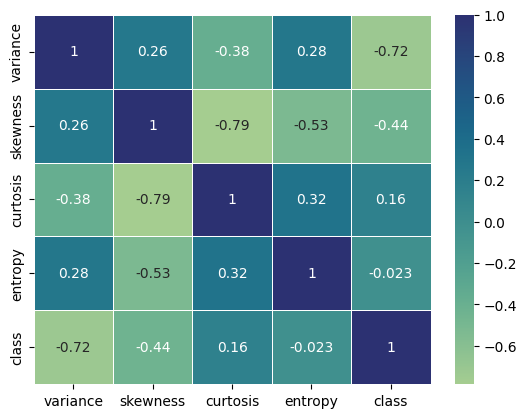

In [10]:
sns.heatmap(data = dados.corr(),
            annot = True,
            linewidth=.5,
            cmap="crest"            
            
            )

In [11]:
from sklearn.model_selection import train_test_split

X = dados.drop(columns = ['class'] )
y = dados['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=5)

clf_arvore = DecisionTreeClassifier(random_state=1)

clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)

clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)

clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)


In [13]:
grids = [clf_KNN, clf_arvore, clf_floresta, clf_svm, clf_mlp ]

for grid in grids:
  grid.fit(X_train, y_train)


grid_dict = {0: 'K-Nearest Neighbors', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'SVC', 
             4: 'MLP Classifier'}

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test,y_test)))


    

K-Nearest Neighbors Test Accuracy: 0.9975728155339806
Decision Trees Test Accuracy: 0.9927184466019418
Random Forest Test Accuracy: 0.9927184466019418
SVC Test Accuracy: 1.0
MLP Classifier Test Accuracy: 1.0


Resposta correta:
* K-Nearest Neighbors Test Accuracy: 0.99757. 
* Decision Trees Test Accuracy: 0.98786. 
* Random Forest Test Accuracy: ??
* SVC Test Accuracy: 1.0
* MLP Classifier Test Accuracy: 1.0

<Axes: >

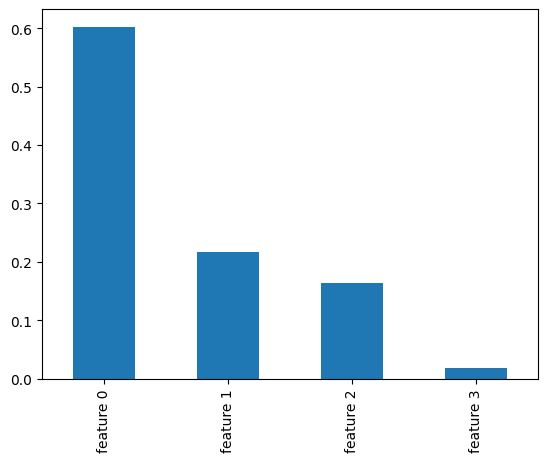

In [28]:
importances = clf_arvore.feature_importances_

feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

forest_importances.plot.bar()

In [29]:
dados.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')